# Task 1

Task 1: Build a **Multiple Linear Regression model** that predicts the number of deaths in various countries due to COVID-19. You are free to select and choose the dataset you would like to use while building the model and are allowed to use the Pandas Library in your code and can use Excel.

The following technical/tool constraint applies: you are NOT allowed to use any existing machine learning packages, such as scikit-learn.

As a general guide, you may need to undertake the following actions:
- Find data sets for the **number of deaths** in various countries **(a minimum of 20 countries)** due to COVID-19.
- Research for appropriate predictor variables to predict deaths due to COVID-19.
- You may use time as one of the predictors (in which case you could attempt to predict death rates in the future), or you may choose to leave it out (in which case, you would be looking at the deaths at a fixed chosen point in time).
- Find data sets on the chosen predictors for the various countries in the model.
- Use **plots** to visualize and understand your data.
- Build a **model** and **test the accuracy of your model**, using an appropriately chosen metric(hint: r2 is not a good metric for this task).
- If needed, improve your model by incorporating other predictors, and/or removing existing ones.
- Discuss your data sets, model, accuracy, and what metrics you used to judge the accuracy.

In [2]:
# import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Load data 
We use data from [Our World in Data](https://github.com/owid/covid-19-data/blob/master/public/data/README.md) 

In [3]:
# importing the dataset by reading the csv file
df = pd.read_csv('covid_data.csv')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134010,ZWE,Africa,Zimbabwe,2021-11-13,133393.0,64.0,32.143,4696.0,2.0,1.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
134011,ZWE,Africa,Zimbabwe,2021-11-14,133428.0,35.0,34.429,4696.0,0.0,1.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
134012,ZWE,Africa,Zimbabwe,2021-11-15,133438.0,10.0,33.286,4697.0,1.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
134013,ZWE,Africa,Zimbabwe,2021-11-16,133505.0,67.0,37.571,4698.0,1.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


### Cleaning data

In [4]:
pd.set_option('display.max_rows', None)
print(pd.options.display.max_rows)
# pd.reset_option('display.max_rows')

None


In [5]:
df.isna().sum()

iso_code                                           0
continent                                       8552
location                                           0
date                                               0
total_cases                                     7363
new_cases                                       7365
new_cases_smoothed                              8408
total_deaths                                   18528
new_deaths                                     18332
new_deaths_smoothed                             8408
total_cases_per_million                         8013
new_cases_per_million                           8015
new_cases_smoothed_per_million                  9053
total_deaths_per_million                       19165
new_deaths_per_million                         18969
new_deaths_smoothed_per_million                 9053
reproduction_rate                              29034
icu_patients                                  118019
icu_patients_per_million                      

In [6]:
df.duplicated().sum()

0

### Visualising data

Target: `total_deaths`

Factors affecting death rates: (according to research)

*Factors we have data for and will explore are in **bold***

Healthcare Systems (healthcare capacity)
- `icu_patients`
- `icu_patients_per_million`
- `hosp_patients`
- `hosp_patients_per_million`
- `hospital_beds_per_thousand`
- `handwashing_facilities`

Nature of disease
- `reproduction_rate` (measure no of contacts per unit time)

National Policies
- `stringency_index` 
- `total_tests`
- `total_vaccinations`

Demographics/health
- `population_density`
- `aged_65_older` (Share of the population that is 65 years and older, most recent year available)
- ~~`cardiovasc_death_rate`~~
- ~~`diabetes_prevalence`~~

Economy
- `gdp_per_capita`
- `extreme_poverty`

Others
- `continent`
- `location`
- `date`
- `population_density`


Text(0.5, 1.0, 'Total deaths vs date')

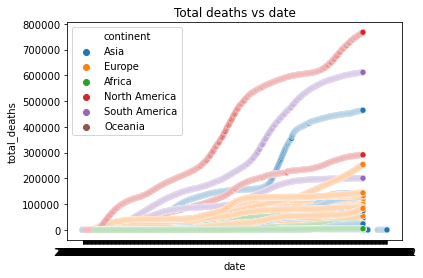

In [7]:
myplot = sns.scatterplot(x='date', y='total_deaths', hue='continent', data=df)
myplot.set_title('Total deaths vs date', fontsize=12)

In [27]:
columns_cat=['date','location','continent']
columns_num=['population_density','gdp_per_capita','total_deaths',
         'extreme_poverty','stringency_index','total_tests','total_vaccinations','population_density',
         'reproduction_rate','handwashing_facilities','hospital_beds_per_thousand','hosp_patients_per_million',
         'hosp_patients','icu_patients_per_million','icu_patients']
df_cat = df.loc[(df['location']=='Argentina')| (df['location']=='Australia') | (df['location']=='Brazil') | (df['location']=='Canada') | (df['location']=='China') | (df['location']=='France') | (df['location']=='Germany') | (df['location']=='India') | (df['location']=='Indonesia') | (df['location']=='Italy') | (df['location']=='Japan') | (df['location']=='Mexico') | (df['location']=='Russia') | (df['location']=='Saudi Arabia') | (df['location']=='South Africa') | (df['location']=='South Korea') | (df['location']=='Turkey') | (df['location']=='United Kingdom') | (df['location']=='United States') | (df['location']=='Singapore') | (df['location']=='Malaysia') | (df['location']=='Hong Kong') ,columns_cat]

df_num = df.loc[(df['location']=='Argentina')| (df['location']=='Australia') | (df['location']=='Brazil') | (df['location']=='Canada') | (df['location']=='China') | (df['location']=='France') | (df['location']=='Germany') | (df['location']=='India') | (df['location']=='Indonesia') | (df['location']=='Italy') | (df['location']=='Japan') | (df['location']=='Mexico') | (df['location']=='Russia') | (df['location']=='Saudi Arabia') | (df['location']=='South Africa') | (df['location']=='South Korea') | (df['location']=='Turkey') | (df['location']=='United Kingdom') | (df['location']=='United States') | (df['location']=='Singapore') | (df['location']=='Malaysia') | (df['location']=='Hong Kong'),columns_num]

#(df['continent']=='Europe') |

In [28]:
def normalize_minmax(dfin):
    df_copy=dfin.copy()
    min_v=dfin.min(axis=0)
    max_v=dfin.max(axis=0)
    dfout=(df_copy-min_v)/(max_v-min_v)
    return dfout

data_norm = normalize_minmax(df_num)
stats = data_norm.describe()
display(stats)

frames=[df_cat,data_norm]
result = pd.concat(frames,axis=1)
# display(result)

,population_density,gdp_per_capita,total_deaths,extreme_poverty,stringency_index,total_tests,total_vaccinations,population_density,reproduction_rate,handwashing_facilities,hospital_beds_per_thousand,hosp_patients_per_million,hosp_patients,icu_patients_per_million,icu_patients
count,14461.000000,14461.000000,13710.000000,10514.000000,14316.000000,10076.000000,6010.000000,14461.000000,12896.000000,2621.000000,13796.000000,3559.000000,3559.000000,4153.000000,4153.000000
mean,0.103099,0.344656,0.090616,0.165828,0.607029,0.079885,0.050443,0.103099,0.152738,0.461247,0.297362,0.238770,0.112830,0.224300,0.097315
std,0.268971,0.232306,0.164958,0.302482,0.180221,0.170294,0.135089,0.268971,0.061388,0.362958,0.269388,0.229604,0.161389,0.207398,0.173164
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.002760,0.137909,0.001561,0.004739,0.504600,0.003899,0.002852,0.002760,0.120482,0.354745,0.142971,0.070720,0.015071,0.053453,0.010592
50%,0.015087,0.373052,0.019677,0.023697,0.638900,0.016837,0.013330,0.015087,0.144578,0.460870,0.178914,0.154189,0.047994,0.155151,0.031740
75%,0.034085,0.483158,0.115131,0.113744,0.726900,0.057132,0.036372,0.034085,0.170396,1.000000,0.357029,0.361642,0.171149,0.350124,0.101346
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


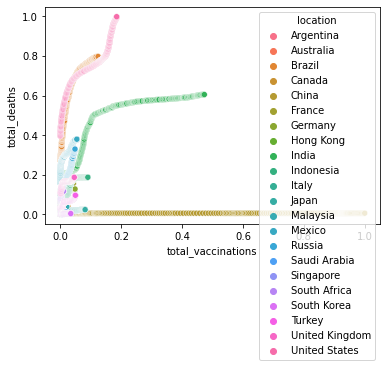

In [29]:
myplot2 = sns.scatterplot(x='total_vaccinations', y='total_deaths', hue='location', data=result)

In [ ]:
myplot3 = sns.scatterplot(x='total_vaccinations', y='total_deaths', hue='location', data=result)

In [13]:
# columns_num=['total_deaths','total_vaccinations','stringency_index','reproduction_rate','aged_65_older']
# columns_cat=['date','location']

# df_num = df.loc[(df['location']=='United Kingdom') | (df['location']=='Germany') 
#               | (df['location']=='Spain') 
#               | (df['location']=='Netherlands') 
#               | (df['location']=='Belgium')
#                ,columns_num]
# df_cat = df.loc[(df['location']=='United Kingdom') | (df['location']=='Germany') 
#               | (df['location']=='Spain') 
#               | (df['location']=='Netherlands') 
#               | (df['location']=='Belgium')
#                ,columns_cat]
# display(df_num)
# display(df_cat)

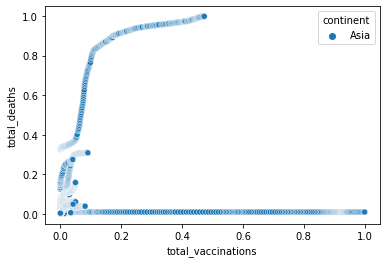

In [23]:
myplot2 = sns.scatterplot(x='total_vaccinations', y='total_deaths', hue='continent', data=result)

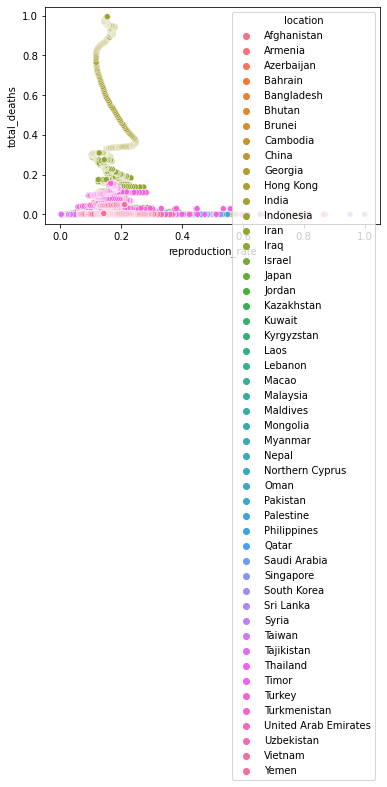

In [24]:
myplot3 = sns.scatterplot(x='reproduction_rate', y='total_deaths', hue='location', data=result)